# Charts and Graph in Matplotlib

# Table of contents

1)  With Matplotlib 
-  How to customize a graph?
-  Different examples of graph


2)  With other libraries

- Seaborn
- Altair
- Bokeh

## 1) With Matplotlib

### How to customized a graph ?

- Titles , axes, legends, colors , font, ....


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


How to plot simple Y,X line-graph ? 

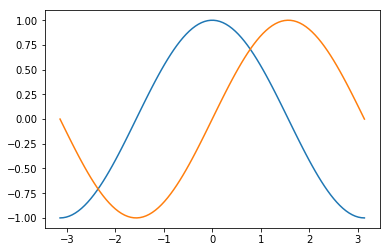

In [2]:
X = np.linspace(-np.pi, np.pi, 100)  #Return evenly spaced numbers over a specified interval.
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

plt.show()

Now, see the difference between the two next charts 

In [3]:
plt.plot(X,C)
plt.plot(X,S)


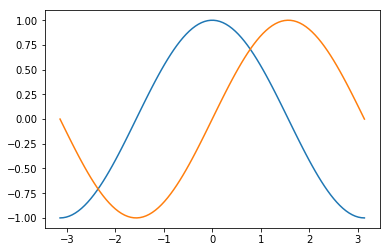

In [4]:

%matplotlib inline
plt.plot(X,C)
plt.plot(X,S)



What is % matplotlib inline used for?

Now, let's choose a general style of our charts. 
Hereby a list of them in matplotlib.

In [5]:
import matplotlib.style as style
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [6]:
style.use('seaborn-darkgrid')

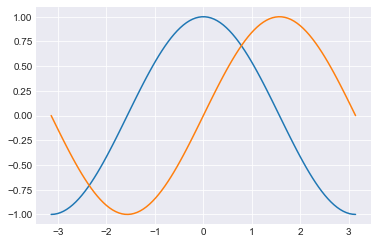

In [7]:
plt.plot(X,C)
plt.plot(X,S)

Let's use the same curves as previously.

Now we will modify the properties of each curves.
Do not hesitate to test with other colours, labels, width of the line and style of the line

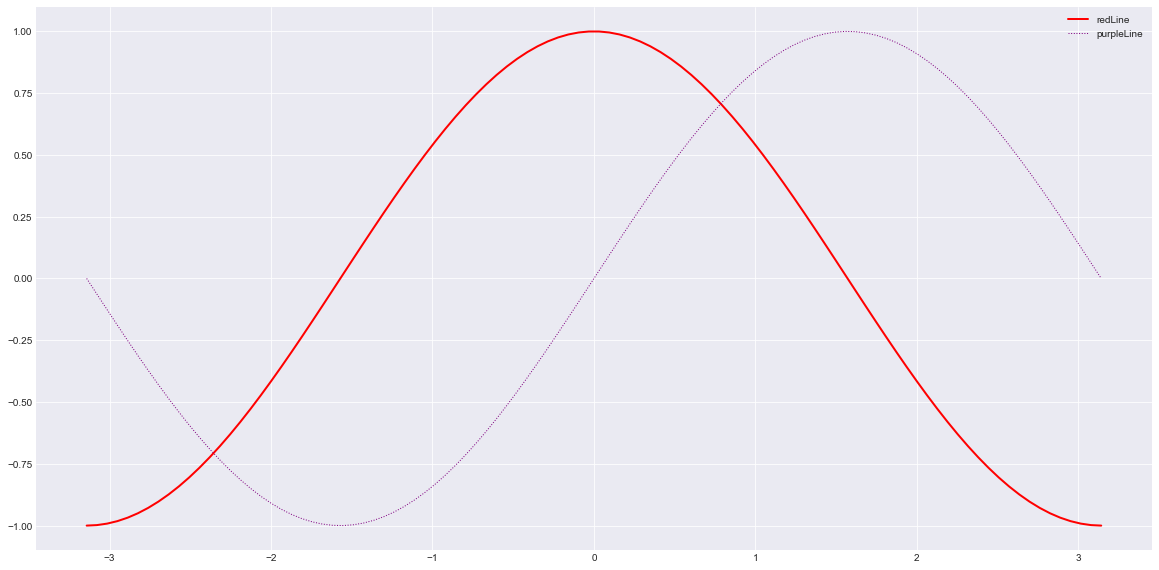

In [10]:
plt.figure(figsize=(20,10))

# Plot cosine using red color with a continuous line of width 2 (pixels)
plt.plot(X, C, color="red", label= 'redLine',linewidth=2.0, linestyle="-")

# Plot sine using purple color with a dotted line of width 1 (pixels)
plt.plot(X, S, color="purple",label='purpleLine', linewidth=1.0, linestyle=':')

#different linestyle possible : [ '-' | '--' | '-.' | ':' | 'steps' ]

plt.legend()


Let's set the scale

Try several limits, ticks and titles.

Text(0,0.5,'y-axis')

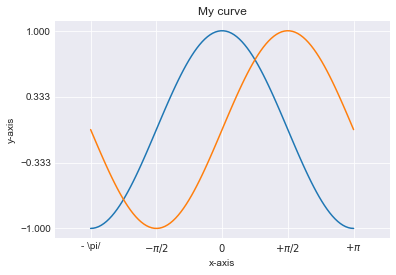

In [11]:
# Set x and y limits
plt.plot(X,C)
plt.plot(X,S)
plt.xlim(-4.0,4.0)
plt.ylim(-1.1,1.1)
# Set x ticks => these are the scales of the axis, you can even give the name you want to each tick.
plt.yticks(np.linspace(-1,1,4,endpoint=True))
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       ['- \pi/', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$'])

# Set labels and titles

plt.title('My curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')


Have you ever seen fig and ax with previous plots?

These are variables that help you to set  parameters of the figure and all the charts in the figure for matplotlib. 

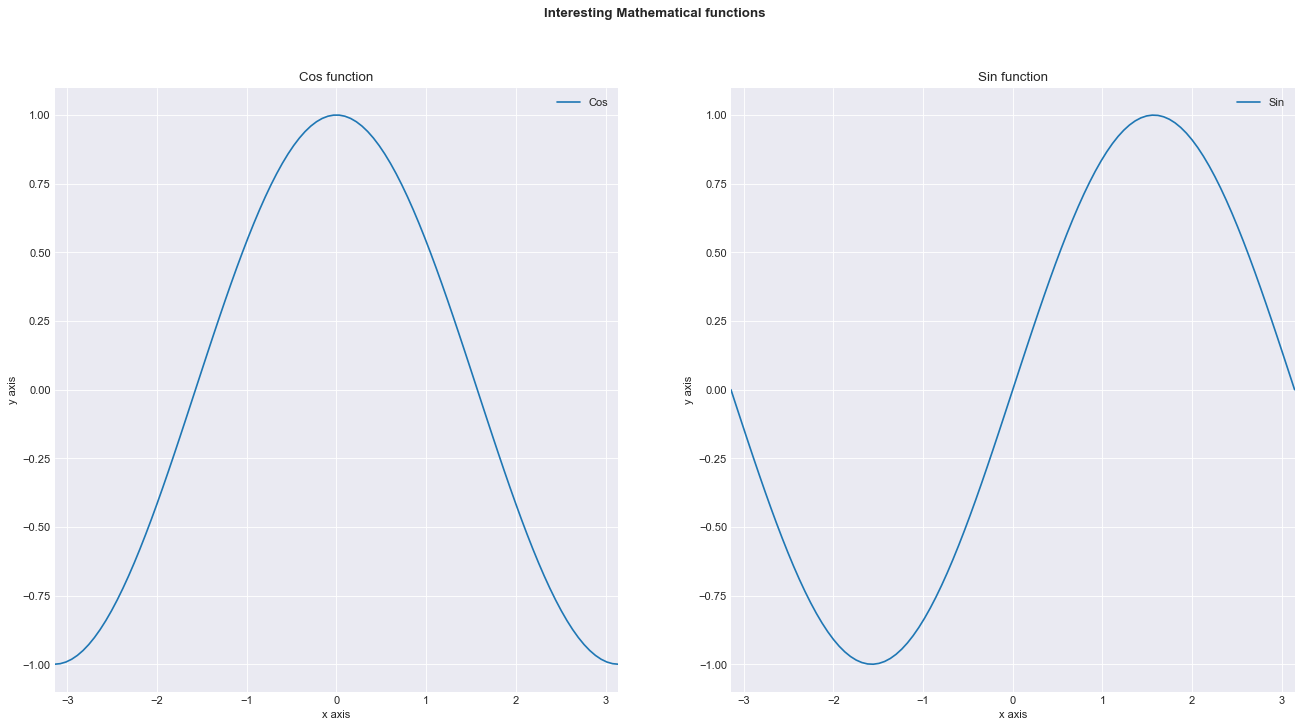

In [14]:
df=pd.DataFrame({'Cos':C, 'Sin':S}, index=X )

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20, 10), dpi= 80)
#figsize : figure.figsize means figure size in inches (width, height)
#dpi: figure.dpi means resolution in dots per inch
 
df.plot(x=df.index,y='Cos',ax=ax0)
df.plot(x=df.index,y='Sin',ax=ax1)

ax0.set(title='Cos function', xlabel='x axis', ylabel='y axis')
ax1.set(title='Sin function', xlabel='x axis', ylabel='y axis')
fig.suptitle('Interesting Mathematical functions', fontsize=12, fontweight='bold');

###### Do some annotations to the plot

Let's study the number of Kickstarter projects that are launched throughout the year.

In [15]:
import pymysql
server = "analyst-toolbelt.cn119w37trlg.eu-west-1.rds.amazonaws.com"
username = "emlyon1"
password = "student1"
connection = pymysql.connect(host=server,
                             user=username,
                             password=password,
                             db='kickstarter',
                             charset='utf8')

SQL = "SELECT * FROM kickstarter.kickstarter"
kicks = pd.read_sql(SQL, connection)
from collections import Counter
import datetime as dt

df=pd.DataFrame({'start_date':list(Counter(kicks.start_date).keys()), 'Count':list(Counter(kicks.start_date).values())})
df.start_date=pd.to_datetime(df.start_date)
df['month']=df.start_date.dt.month
df['year']=df.start_date.dt.year
dfgp=df.groupby(["year",'month']).aggregate(sum)

In [52]:
dfgp.head()

Count
year   month       
2009.0 4.0       14
       5.0       71
       6.0       63
       7.0       71
       8.0      105

Text(1,3600,'Kickstarter analysis')

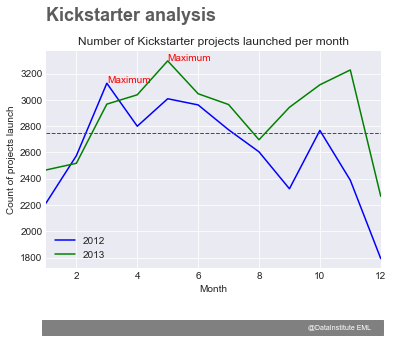

In [53]:
# we select two years to study
df2012=dfgp.loc[dfgp.index.get_level_values(0)==2012,:]
df2013=dfgp.loc[dfgp.index.get_level_values(0)==2013,:]

#initialization of the plot
fig,ax=plt.subplots()


df2012.plot(x=df2012.index.get_level_values(1),y='Count',color="blue", label= '2012', ax=ax)
df2013.plot(x=df2013.index.get_level_values(1),y='Count',color="green", label= '2013',ax=ax)


# Set limits and labels
ax.set(title='Number of Kickstarter projects launched per month', xlabel='Month', ylabel='Count of projects launch')

# Add a line for the average
avg = dfgp.loc[(dfgp.index.get_level_values(0)==2012) | (dfgp.index.get_level_values(0)==2013),'Count'].mean()
ax.axhline(y=avg, color='r', label='Average', linestyle='--', linewidth=1)

# Annotate the maximum of launches in a month for each year
max2012=[df2012.Count.idxmax()[1], df2012.Count.max()]
max2013=[df2013.Count.idxmax()[1], df2013.Count.max()]
for point in [max2012,max2013]:
    ax.text( point[0],point[1], "Maximum",color='r')
    
    
# Add text
ax.text(x =1, y =1250,
    s = '                                                                                                                                   @DataInstitute EML    ',
    fontsize = 7, color = 'white', backgroundcolor = 'grey')


# Adding a title and a subtitle
ax.text(x =1, y = 3600, s = "Kickstarter analysis",
               fontsize = 18, weight = 'bold', alpha = .75)


How to save a plot ? 

In [15]:
fig.savefig('kick.png', transparent=False, dpi=80, bbox_inches="tight")

### Different examples of graph

- lines , scatter, piechart, facetgrid, ...

http://matplotlib.org/api/pyplot_summary.html

scatter plot (points)

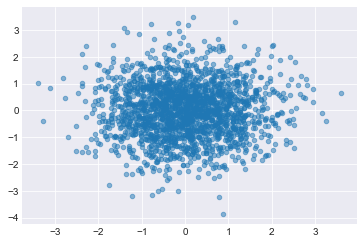

In [16]:
n = 2017
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
plt.scatter(X,Y, alpha=.5, s=20,marker= 'o')
# alpha is used to give a % of transparency
# different other markers [ '+' | ',' | '.' | '1' | '2' | '3' | '4' ]

Bar charts

<Container object of 15 artists>

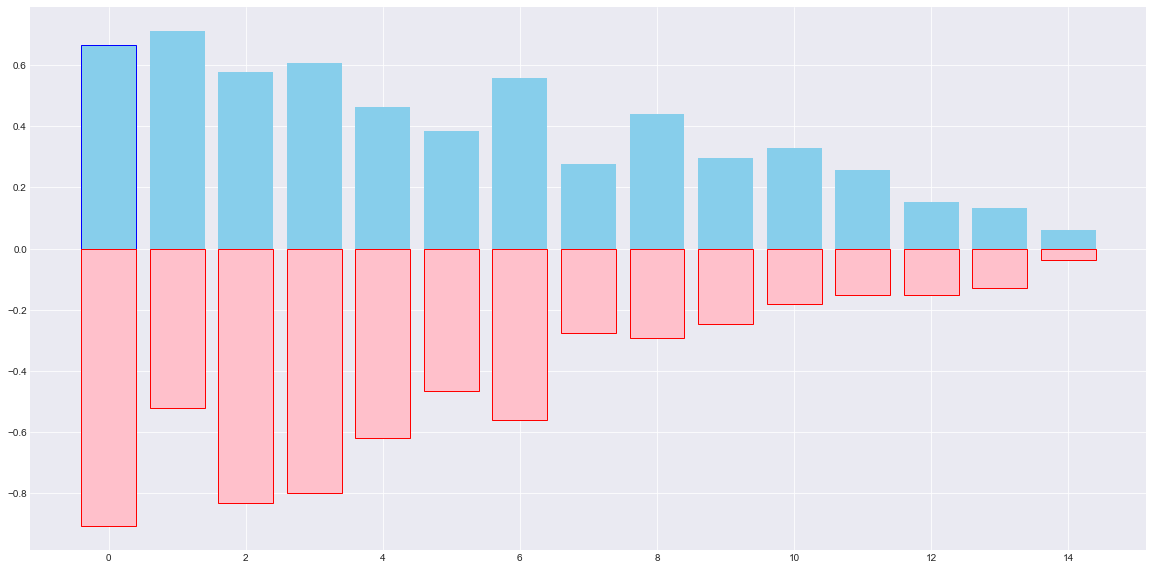

In [37]:
n = 15
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
plt.figure(figsize=(20,10))
plt.bar(X, +Y1, facecolor='skyblue', edgecolor='blue')
plt.bar(X, -Y2, facecolor='pink', edgecolor=['red']*len(X))

Histograms

(array([  0.,   1.,  11.,  10.,  19.,  39.,  44.,  38.,  23.,  10.,   3.,
          0.,   2.,   0.]),
 array([ 10.        ,  12.14285714,  14.28571429,  16.42857143,
         18.57142857,  20.71428571,  22.85714286,  25.        ,
         27.14285714,  29.28571429,  31.42857143,  33.57142857,
         35.71428571,  37.85714286,  40.        ]),
 <a list of 1 Patch objects>)

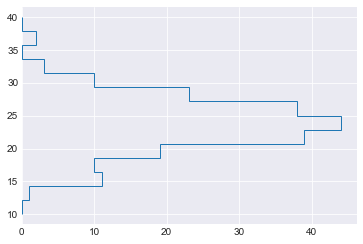

In [17]:
n=200
X=np.random.normal(24,4,n)
bins=np.linspace(10,40, 15) 

plt.hist(X, bins, histtype='step', orientation='horizontal')

Area line

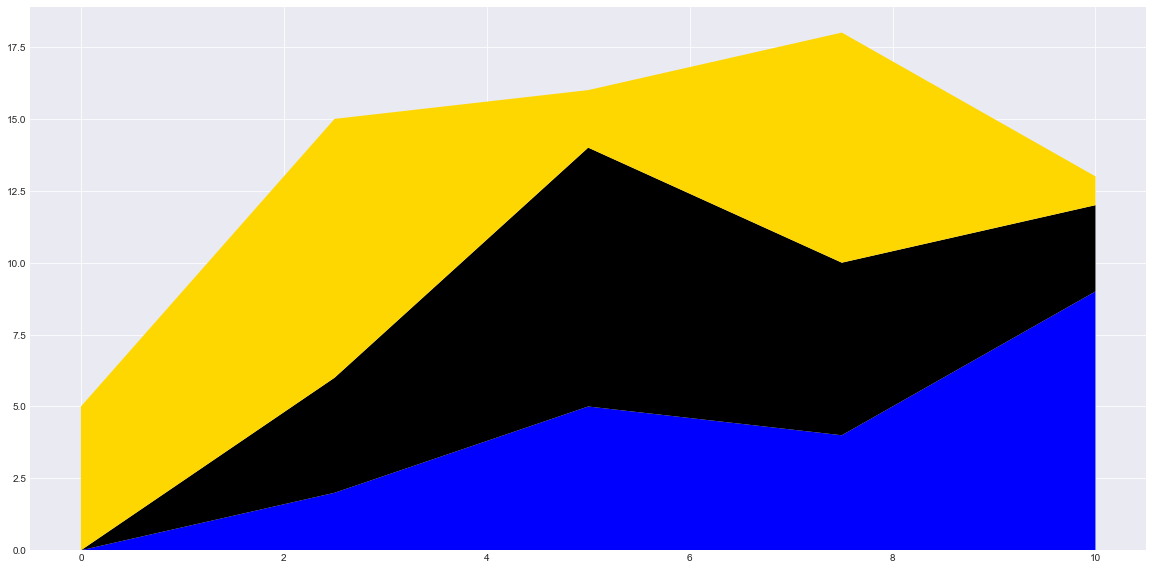

In [18]:
x=np.linspace(0,10, 5)
var1=np.random.randint(0,10,5)
var2=np.random.randint(0,10,5)
var3=np.random.randint(0,10,5)

plt.figure(figsize=(20,10))
plt.plot([],[],color='blue',label='var1')
plt.plot([],[],color='black',label='var2')
plt.plot([],[],color='gold',label='var3')
plt.stackplot(x,var1,var2,var3,colors=['blue','black','gold'])

In [48]:
var1

array([6, 4, 1, 9, 7])

Pie chart

([<matplotlib.patches.Wedge at 0x20f4bc0bda0>,
 [Text(0.701166,0.847565,'tomato sauce'),
  Text(-0.735488,0.948186,'beef'),
  Text(-1.09946,-0.0345519,'cheese'),
  Text(0.273559,-1.06544,'pasta')])

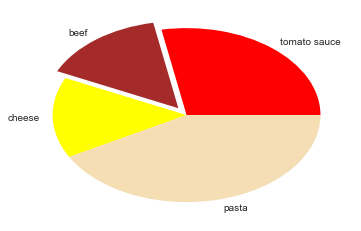

In [19]:
value=[28,15,15,42]
element=['tomato sauce','beef','cheese','pasta']
cols=['red','brown','yellow','wheat']

plt.pie(value,labels=element,colors=cols,shadow=False, explode=(0,0.1,0,0))

In [ ]:
# map 